# California Housing

Es un problema de regresión basado en datos de precios de viviendas en California. 
Se busca predecir el valor medio de las casas en diferentes distritos en función de características como la cantidad habitaciones, ingresos medios de la zona, población, entre otras.

Los valores de los hiperparámetros con los que tuve buenos resultados son:
- Optimizador: 
- Learning rate: 
- Epochs :   
- Función de Activación : 
- Capas de la Red : 
- Neuronas de cada capa : 

In [32]:
import numpy as np
from main.neural_network import train, predict
from main.nn_components.network_layer import FullyConnectedLayer
from main.nn_components.activations_functions import Relu, Tanh
from main.nn_components.loss_functions import mse, mse_derivative
from main.nn_components.graphic_regression import learning_curve, dispersion_graph
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)


X_train = X_train[0:2000]
X_test = X_test[0:600]
y_train = y_train[0:2000]
y_test = y_test[0:600]

X_train = np.reshape(X_train, (2000, 8, 1))
X_test = np.reshape(X_test, (600, 8, 1))
y_train = np.reshape(y_train, (2000, 1))
y_test = np.reshape(y_test, (600, 1))

nn = [
    FullyConnectedLayer(8, 12),
    Relu(),
    FullyConnectedLayer(12, 6),
    Relu(),
    FullyConnectedLayer(6, 1)
]

train_loss = train(nn, mse, mse_derivative, X_train, y_train, epochs=7000, learning_rate=0.0000002, optim='sgd')

y_pred = []
for X, y in zip(X_test, y_test):
    output = predict(nn, X)
    y_pred.append(output)
    print(f'Pred: {output}, Actual: {y}')

KeyboardInterrupt: 

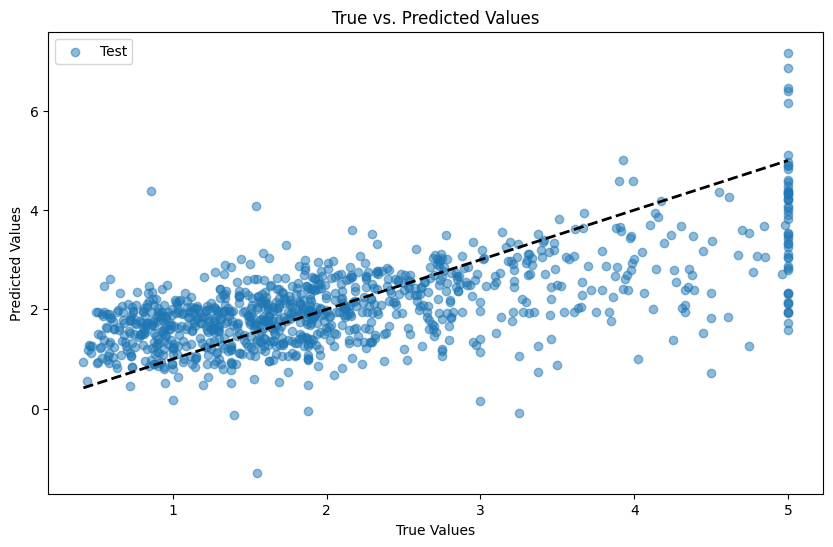

In [24]:
dispersion_graph(y_test, y_pred)

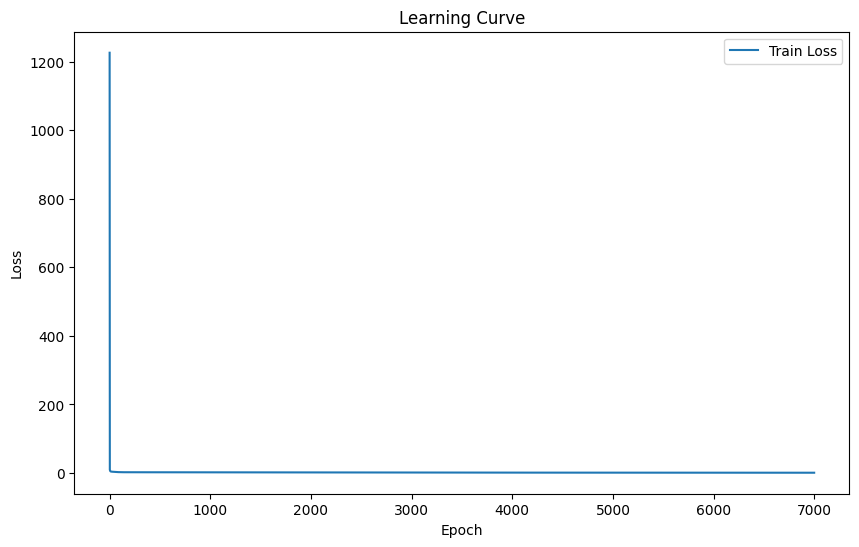

In [25]:
learning_curve(train_loss)